In [1]:
#import magic and libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#import data set
charity = pd.read_csv('Charity.csv')

In [3]:
#checkout my axes
charity.axes

[Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             45092, 45093, 45094, 45095, 45096, 45097, 45098, 45099, 45100,
             45101],
            dtype='int64', length=45102),
 Index([u'suburb', u'state', u'postcode', u'num_streets', u'RenewalsOrAcq',
        u'collection_amount', u'donation_amount', u'total_received', u'dob',
        u'age', u'weekends'],
       dtype='object')]

In [4]:
#show head
charity.head()

suburb state  postcode  num_streets RenewalsOrAcq  collection_amount  \
0  Darwin    NT       801            2      Renewals             315.00   
1  DARWIN    NT       801            6           Acq             303.55   
2   PARAP    NT       804            4      Renewals             250.00   
3   PARAP    NT       804            2      Renewals              28.60   
4   PARAP    NT       804            2      Renewals              78.00   

   donation_amount  total_received         dob  age  weekends  
0                0          315.00  10/10/1943   72         4  
1                0          303.55   1/01/1950   65         4  
2                0          250.00   8/02/1935   80         4  
3               50           78.60   3/10/1958   57         4  
4                0           78.00          na  NaN         4

In [5]:
#describe numeric data
charity.describe()
## note- need to get age working and create binary for renewals/acq
## change postcode to char

postcode   num_streets  collection_amount  donation_amount  \
count  45102.000000  45102.000000       45102.000000     45102.000000   
mean    3965.124629      2.856747          76.817654         4.059311   
std     1446.307894      2.615003          70.697075        21.337872   
min      801.000000      0.000000        -550.000000      -150.000000   
25%     2611.000000      1.000000          36.000000         0.000000   
50%     4020.000000      1.000000          60.000000         0.000000   
75%     5043.000000      3.000000         100.000000         0.000000   
max     9726.000000     42.000000        2123.000000      1000.000000   

       total_received      weekends  
count    45102.000000  45102.000000  
mean        80.876965      3.409782  
std         70.903512      0.847609  
min       -550.000000      2.000000  
25%         40.000000      3.000000  
50%         63.000000      4.000000  
75%        100.000000      4.000000  
max       2123.000000      4.000000

In [6]:
#create dummies for acquisition, remove unnecessary columns
dummies = pd.get_dummies(charity.RenewalsOrAcq)
charity = pd.concat([charity, dummies], axis=1)
charity.drop(['Renewals'], inplace=True, axis=1)
charity.drop(['dob'], inplace=True, axis=1)
charity.drop(['RenewalsOrAcq'], inplace=True, axis=1)
charity.drop(['suburb'], inplace=True, axis=1)
charity.drop(['state'], inplace=True, axis=1)
charity.head()

postcode  num_streets  collection_amount  donation_amount  total_received  \
0       801            2             315.00                0          315.00   
1       801            6             303.55                0          303.55   
2       804            4             250.00                0          250.00   
3       804            2              28.60               50           78.60   
4       804            2              78.00                0           78.00   

   age  weekends  Acq  
0   72         4    0  
1   65         4    1  
2   80         4    0  
3   57         4    0  
4  NaN         4    0

In [15]:
#drop na values for age and convert to numeric
charity = charity.dropna(subset=['age'])
charity['age'] = charity['age'].convert_objects(convert_numeric=True)
charity = charity.dropna(subset=['age'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [8]:
#convert postcode to char values

charity['postcode'] = charity['postcode'].astype(str)
charity.postcode.dtype

dtype('O')

In [9]:
charity.head()

postcode  num_streets  collection_amount  donation_amount  total_received  \
0      801            2             315.00                0          315.00   
1      801            6             303.55                0          303.55   
2      804            4             250.00                0          250.00   
3      804            2              28.60               50           78.60   
5      810            2             521.50                0          521.50   

   age  weekends  Acq  
0   72         4    0  
1   65         4    1  
2   80         4    0  
3   57         4    0  
5   67         4    1

In [10]:
#have another look at the data
charity.describe(include='all')

postcode   num_streets  collection_amount  donation_amount  \
count     26599  26599.000000       26599.000000     26599.000000   
unique     1772           NaN                NaN              NaN   
top        4350           NaN                NaN              NaN   
freq        230           NaN                NaN              NaN   
mean        NaN      2.881574          77.968487         3.740479   
std         NaN      2.548418          71.064562        18.739361   
min         NaN      0.000000        -414.950000      -150.000000   
25%         NaN      1.000000          37.000000         0.000000   
50%         NaN      2.000000          61.000000         0.000000   
75%         NaN      3.000000         100.000000         0.000000   
max         NaN     40.000000        2123.000000      1000.000000   

        total_received           age      weekends           Acq  
count     26599.000000  26597.000000  26599.000000  26599.000000  
unique             NaN           NaN           NaN           NaN  
top                NaN           NaN           NaN           NaN  
freq               NaN           NaN           NaN           NaN  
mean         81.708966     62.471858      3.352908      0.613933  
std          70.877029     14.066151      0.870696      0.486855  
min        -500.000000      0.000000      2.000000      0.000000  
25%          40.000000     54.000000      2.000000      0.000000  
50%          64.000000     65.000000      4.000000      1.000000  
75%         101.300000     72.000000      4.000000      1.000000  
max        2123.000000    103.000000      4.000000      1.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113ac2590>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119aeedd0>]], dtype=object)

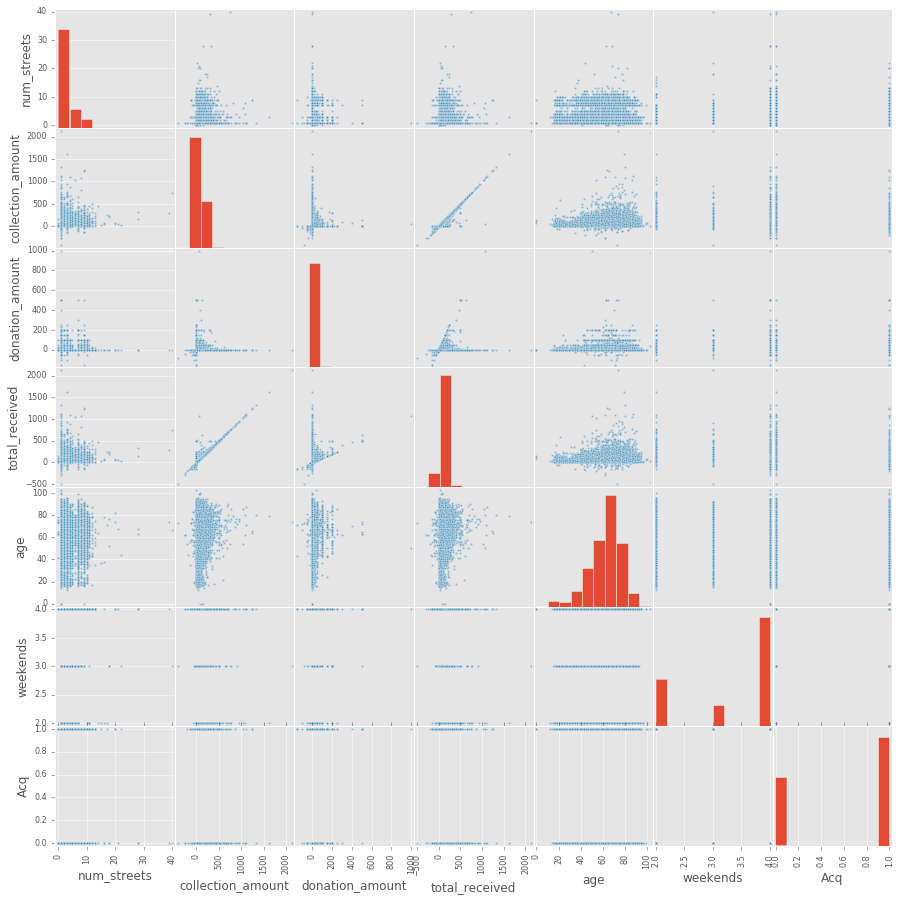

In [11]:
#create scatter matrix
pd.scatter_matrix(charity, figsize=(15,15))

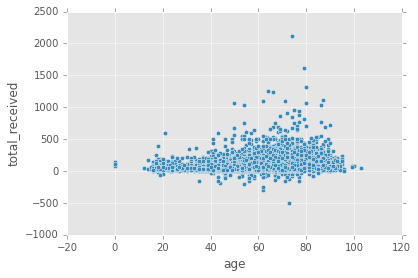

In [12]:
#close up scatter of number of age and total recieved
charity.plot(kind='scatter', x='age', y='total_received')

In [13]:
#check for NaNs - for some reason when running down this can get stuck..
np.any(np.isnan(charity.age))

True

In [16]:
#Fit a linear regression model using age as a predictor
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['age']
X = charity[feature_cols]
y = charity.total_received
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

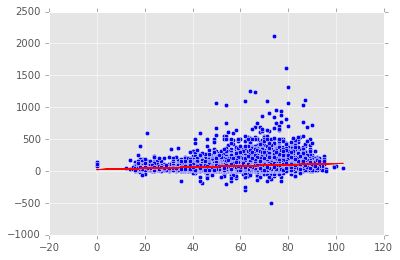

In [17]:
#plot a graph
rec_pred = linreg.predict(X)
plt.plot(charity.age, rec_pred, color='red')
plt.scatter(charity.age, charity.total_received)

In [18]:
#K means clustering
from sklearn.cluster import KMeans

np.random.seed(0)

est = KMeans(n_clusters=3, init='random')
est.fit(charity)
y_kmeans = est.predict(charity)



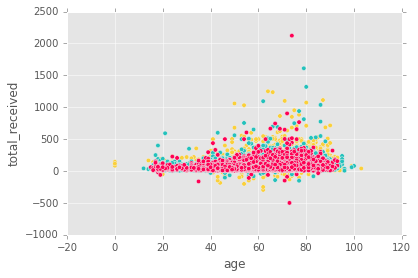

In [19]:
#plot the clusters
colors = np.array(['#FF0054','#FBD039','#23C2BC','#23C2BC'])
plt.figure()
charity.plot(kind='scatter', x='age', y='total_received',c=colors[y_kmeans])

In [ ]:
#Try Decision Trees
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [ ]:
#split data up for training
charity = d['Survived'].copy(deep=True)
del d['Survived']

d

In [29]:
y = charity.array('total_received')
print y

AttributeError: 'DataFrame' object has no attribute 'array'

In [25]:
X = charity
#X.drop('total_received', axis=1, inplace=True)
#X.drop('collection_amount', axis=1, inplace=True)
#X.drop('donation_amount', axis=1, inplace=True)
#y = X.total_received()
X.describe(include='all')

postcode   num_streets  collection_amount  donation_amount  \
count     26597  26597.000000       26597.000000     26597.000000   
unique     1772           NaN                NaN              NaN   
top        4350           NaN                NaN              NaN   
freq        230           NaN                NaN              NaN   
mean        NaN      2.881716          77.967018         3.738053   
std         NaN      2.548462          71.066831        18.735377   
min         NaN      0.000000        -414.950000      -150.000000   
25%         NaN      1.000000          37.000000         0.000000   
50%         NaN      2.000000          61.000000         0.000000   
75%         NaN      3.000000         100.000000         0.000000   
max         NaN     40.000000        2123.000000      1000.000000   

                 age      weekends           Acq  
count   26597.000000  26597.000000  26597.000000  
unique           NaN           NaN           NaN  
top              NaN           NaN           NaN  
freq             NaN           NaN           NaN  
mean       62.471858      3.352859      0.613979  
std        14.066151      0.870711      0.486845  
min         0.000000      2.000000      0.000000  
25%        54.000000      2.000000      0.000000  
50%        65.000000      4.000000      1.000000  
75%        72.000000      4.000000      1.000000  
max       103.000000      4.000000      1.000000

In [ ]:
#PCA Analysis
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(n_components=1)
X_r = pca.fit_transform(X)

y = charity.total_received()

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA(2 components) of IRIS dataset')

In [ ]:
#from sklearn import svm
#from sklearn.datasets import samples_generator
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_regression
#from sklearn.pipeline import Pipeline
# generate some data to play with
#X, y = samples_generator.make_classification(
# n_informative=5, n_redundant=0, random_state=42)
# ANOVA SVM-C
#anova_filter = SelectKBest(f_regression, k=5)
#clf = svm.SVC(kernel='linear')
#anova_svm = Pipeline([('anova', anova_filter), ('svc', clf)])
## You can set the parameters using the names issued
## For instance, fit using a k of 10 in the SelectKBest
## and a parameter 'C' of the svm
#anova_svm.set_params(anova__k=10, svc__C=.1).fit(X, y)
#...                                              
#Pipeline(steps=[...])
#>>> prediction = anova_svm.predict(X)
#>>> anova_svm.score(X, y)                        
#0.77...
#>>> # getting the selected features chosen by anova_filter
#>>> anova_svm.named_steps['anova'].get_support()
#... 
#array([ True,  True,  True, False, False,  True, False,  True,  True, True,
       #False, False,  True, False,  True, False, False, False, False,
       #True], dtype=bool)